# Time to Test

In this notebook, the Key Performance Indicator that we capture is `the time to test` or `the total runtime` for each test as it would help filter and observe tests with longer than expected runtimes.

By measuring this metric, we can observe the trend of test runtimes and check if the execution time of the tests exceed the specified values. If the execution of the test suite takes a long time, we may wish to optimize our test code or track down tests that are taking too long. This metric can also be used to draw a correlation to the tests turning out to be flaky.

Here, we capture:
* Time taken to run tests over time

In [2]:
import requests
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

For extracting this metric, we will dig into the time series data in the detailed test grids.

There are inbuilt Graphs within TestGrid for each Test in the job, which capture the time taken for running each test.

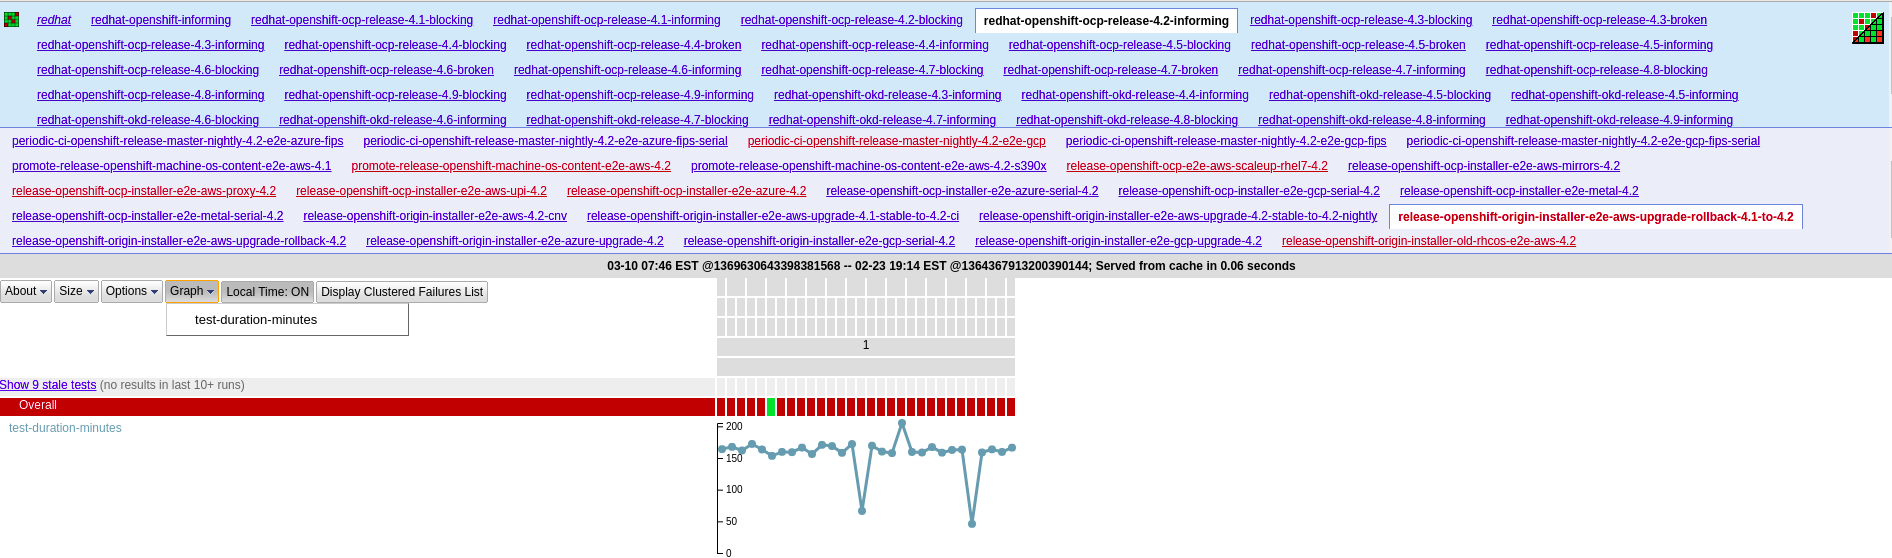

In [3]:
Image(filename="../../../../docs/assets/images/time_duration_01.png")

The time elapsed for the test (which is denoted by the metric test-duration-minutes) is plotted over time and it captures values such as `24.76` minutes, which is the time that it took to run the test `operator.Run template e2e-aws-upgrade - e2e-aws-upgrade container setup` under a particular build ID (`1369630643398381568`) at a given timestamp.

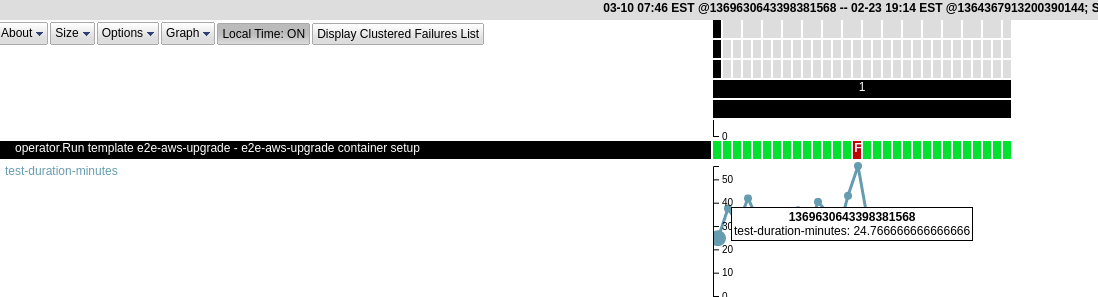

In [4]:
Image(filename="../../../../docs/assets/images/time_duration_02.png")

Here, we will get the time-duration and graphs data for the job "release-openshift-ocp-installer-e2e-azure-4.2" 

In [5]:
response = requests.get(
    "https://testgrid.k8s.io/redhat-openshift-ocp-release-4.2-informing/table? \
    &show-stale-tests=&tab=release-openshift-ocp-installer-e2e-azure-4.2&graph-metrics=test-duration-minutes"
)

In [6]:
details = pd.DataFrame(response.json()["tests"])

In [7]:
details.head(2)

,name,original-name,alert,linked_bugs,messages,short_texts,statuses,target,graphs,user_property
0,Overall,Overall,None,[],"[, , Build failed outside of test results, , ,...","[, , F, , , , , , , , , , , , , , , , , , , , ...","[{'count': 2, 'value': 1}, {'count': 4, 'value...",Overall,"[{'metric': ['test-duration-minutes'], 'values...",None
1,operator.Run template e2e-azure - e2e-azure co...,operator.Run template e2e-azure - e2e-azure co...,None,[],"[, , , , , , , , , , , Installing from release...","[, , , , , , , , , , , F, , , , , , , , , , , ...","[{'count': 2, 'value': 1}, {'count': 2, 'value...",operator.Run template e2e-azure - e2e-azure co...,"[{'metric': ['test-duration-minutes'], 'values...",None


In [8]:
details = details[["name", "graphs"]]

In [9]:
details.head(3)

,name,graphs
0,Overall,"[{'metric': ['test-duration-minutes'], 'values..."
1,operator.Run template e2e-azure - e2e-azure co...,"[{'metric': ['test-duration-minutes'], 'values..."
2,operator.Run template e2e-azure - e2e-azure co...,"[{'metric': ['test-duration-minutes'], 'values..."


The `graphs` field is a list for each test within a job which consists of time taken in minutes for running that particular test over multiple timestamps and the "Overall" is an aggregate of time taken for the individual tests for that particular build.

In [10]:
overall_list = details.graphs[0][0]["values"][0]

The overall list can be considered as a list which aggregates time taken to run each test within the job or build. So, that means the overall list, can be a good proxy for time taken to run that job/build over multiple timestamps and can be a good indicator of how long it took to execute that job over time. 

In [11]:
len(overall_list)

118

In [12]:
# Metrics
avg_duration = sum(overall_list) / len(overall_list)
print("Average test duration for the job/build is: %f minutes" % (avg_duration))

Average test duration for the job/build is: 95.120763 minutes


In [13]:
# pd.set_option('display.max_colwidth', None)

In [14]:
# get timestamps for which tests were ran for the job
timestamps = response.json()["timestamps"]
timestamps = [dt.datetime.fromtimestamp(item / 1000) for item in timestamps]

In [15]:
time_taken_df = pd.DataFrame({"timestamp": timestamps, "time_duration": overall_list})

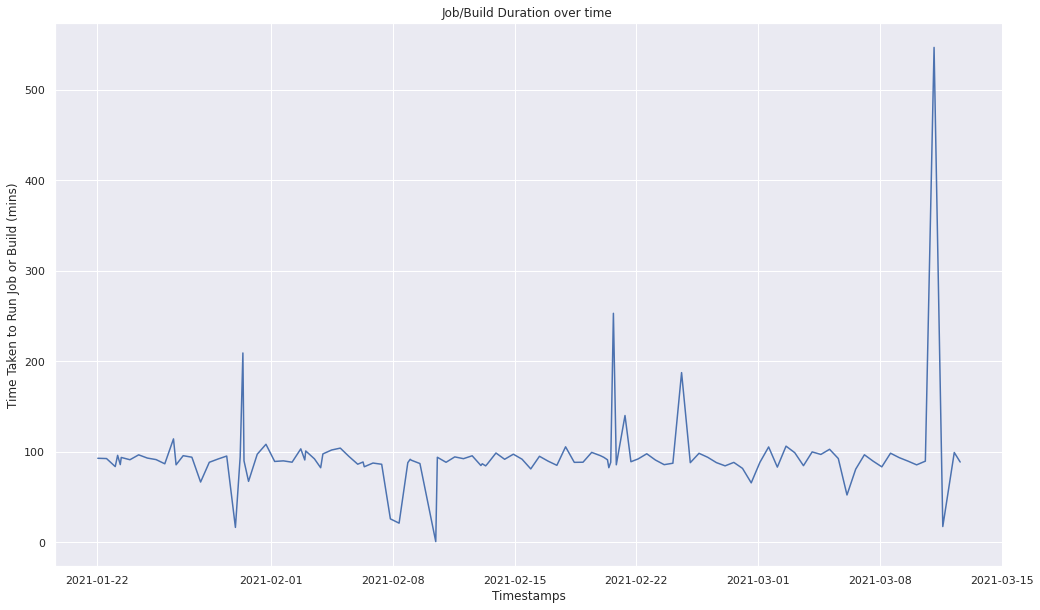

In [16]:
sns.set(rc={"figure.figsize": (17, 10)})
sns.lineplot(x="timestamp", y="time_duration", data=time_taken_df)
plt.xlabel("Timestamps")
plt.ylabel("Time Taken to Run Job or Build (mins)")
plt.title("Job/Build Duration over time ")
plt.show()

In the above graph, we see how the time taken to run a build changes over time and we notice when there are spikes or when irregular builds occur.